# Проект моделирования эффективности извлечения золота

Необходимо подготовить прототип модели предсказания коэффициента восстановления золота из золотосодержащей руды.   
В нашем распоряжении данные с параметрами добычи и очистки.  


### Описание данных:

    • gold_recovery_train.csv — обучающая выборка
    • gold_recovery_test.csv — тестовая выборка
    • gold_recovery_full.csv — исходные данные

# Содержание проекта

[1. Подготовка данных](#1)  
+ [1.1. Изучение исходных данных](#1.1.)  
+ [1.2. Проверка расчета эффективности обогащения](#1.2.)  
+ [1.3. Анализ признаков](#1.3.)  
+ [1.4. Предобработка данных](#1.4.)  
[Вывод](#1_itog)  

[2.Анализ данных](#2)  
+ [2.1. Оценка изменения концентрации металлов на различных этапах очистки](#2.1.)  
+ [2.2. Анализ распределения размеров гранул сырья](#2.2.)  
+ [2.3. Исследование сумарной концентрации веществ на разных стадиях обработки](#2.3.)  
[Вывод](#2_itog)  

[3.Построение модели](#3)  
+ [3.1. Создание функции вычисления sMAPE](#3.1)  
+ [3.2. Обучение моделей](#3.2.)  
[Вывод](#3_itog)  

[Общий вывод](#itog)       

# 1. Подготовка данных<a id="1"></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme()
sns.set()


## 1.1. Изучение исходных данных<a id="1.1."></a>

In [3]:
display(gold_train.head())
display(gold_test.head())
display(gold_full.head())
display(gold_train.info())
display(gold_test.info())
display(gold_full.info())
display(gold_train.describe())
display(gold_test.describe())
display(gold_full.describe())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


### Вывод

Предварительный анализ говорит о необходимости:  
+ провести работу с пропусками  
+ провести масштабирование признаков

## 1.2. Проверка рассчета эффективности обогащения <a id="1.2."></a>

Эффективность обогащения будет рассчитываться по формуле:
$$Recovery = \frac{C(F-T)}{F(C-T)}100\%$$    
  

где:  
Recovery - rougher.outpoot.recovery  
C - rougher.outpoot.concentrate_au  
F - rougher.input.feed_au  
T - rougher.outpoot.tail_au  

Создадим отдельный датафрейм с этими столбцами из обучающей выборки:

In [4]:
check_recovery = gold_train.loc[:, ['rougher.output.recovery',
                                    'rougher.output.tail_au',
                                    'rougher.input.feed_au',
                                    'rougher.output.concentrate_au']]
display(check_recovery.head())
display(check_recovery.info())

,rougher.output.recovery,rougher.output.tail_au,rougher.input.feed_au,rougher.output.concentrate_au
0,87.107763,1.170244,6.486150,19.793808
1,86.843261,1.184827,6.478583,20.050975
2,86.842308,1.162562,6.362222,19.737170
3,87.226430,1.079755,6.118189,19.320810
4,86.688794,1.012642,5.663707,19.216101


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.recovery        14287 non-null  float64
 1   rougher.output.tail_au         14611 non-null  float64
 2   rougher.input.feed_au          16777 non-null  float64
 3   rougher.output.concentrate_au  16778 non-null  float64
dtypes: float64(4)
memory usage: 527.0 KB


None

Имеем значительное количество пропусков в `rougher.output.recovery`. Т.к. целью данного раздела является проверка корректности имеющихся значений, можем удалить пустые строки.

In [5]:
# удаляем
check_recovery = check_recovery.query(
    '`rougher.output.recovery` == `rougher.output.recovery`')

In [6]:
# проверяем
display(check_recovery.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.recovery        14287 non-null  float64
 1   rougher.output.tail_au         14287 non-null  float64
 2   rougher.input.feed_au          14287 non-null  float64
 3   rougher.output.concentrate_au  14287 non-null  float64
dtypes: float64(4)
memory usage: 558.1 KB


None

Введем переменные для расчета эффективности обогащения, расчитаем значение recovery, добавим его в отдельный столбец.

In [7]:
Recovery = check_recovery.loc[:, 'rougher.output.recovery']
C = check_recovery.loc[:, 'rougher.output.concentrate_au']
F = check_recovery.loc[:, 'rougher.input.feed_au']
T = check_recovery.loc[:, 'rougher.output.tail_au']

In [8]:
check_recovery['rougher.output.recovery_check'] = (
    C * (F - T) / (F * (C - T))) * 100

In [9]:
display(check_recovery.head())

,rougher.output.recovery,rougher.output.tail_au,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.recovery_check
0,87.107763,1.170244,6.486150,19.793808,87.107763
1,86.843261,1.184827,6.478583,20.050975,86.843261
2,86.842308,1.162562,6.362222,19.737170,86.842308
3,87.226430,1.079755,6.118189,19.320810,87.226430
4,86.688794,1.012642,5.663707,19.216101,86.688794


Проверим расхождения между имеющимися и расчитанными значениями признака `recovery`.  
Расчитаем значение среднего абсолютного отклонения (МАЕ):

In [10]:
mae = mean_absolute_error(
    check_recovery['rougher.output.recovery'], check_recovery['rougher.output.recovery_check'])
display(mae)

9.303415616264301e-15

Проверим максимальное расхождение между расчетным и исходным значением `rougher.output.recovery`

In [11]:
check_recovery['delta'] = check_recovery['rougher.output.recovery_check'] - \
    check_recovery['rougher.output.recovery']

In [12]:
display(check_recovery.sort_values(by='delta', ascending=False).head())

,rougher.output.recovery,rougher.output.tail_au,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.recovery_check,delta
6682,92.815063,1.957962,12.306452,20.828212,92.815063,7.105427e-14
4440,87.042424,1.986243,9.212041,20.094297,87.042424,5.684342e-14
16385,88.900815,1.822374,9.899309,22.163119,88.900815,5.684342e-14
600,77.655874,1.962298,6.399908,18.321495,77.655874,5.684342e-14
9598,80.436545,1.573671,6.052884,19.669918,80.436545,5.684342e-14


Максимальное расхождение составляет 6e-14, что обусловлено особенностями числа с плавающей точкой, т.е. сравниваемые значения можем считать идентичными.

### Вывод

Полученное значение среднего абсолютного отклонения (МАЕ) ничтожно мало, это говорит о том, что имеющиеся в обучающей выборке значения `recovery` рассчитаны верно.

## 1.3. Анализ признаков <a id="1.3."></a>

В тестовой выборке отсутствуют следующие признаки:  
+ final.output.*
+ primary_cleaner.output.*
+ rougher.calculation.*
+ rougher.output.*
+ secondary_cleaner.*

Т.е. параметры, получаемые уже на этапе очистки сырья.  
Эти данные удалим из обучающей выборки, т.к. они не могут участвовать в процессе создания модели.  
Кроме того, в тестовой выборке отсутствуют столбцы целевых признаков:  
+ rougher.output.recovery
+ final.output.recovery

Данные столбцы получим из выборки полных исходных данных.


In [13]:
# добавляем целевые признаки в тестовую выборку
dates = gold_test.date.to_list()
targets = gold_full.query('date == @dates').loc[:, [
    'date', 'final.output.recovery', 'rougher.output.recovery']].reset_index(drop=True)
gold_test = gold_test.merge(targets, on='date', how='outer')

In [14]:
# удаляем лишние столбцы из обучающей выборки
gold_train = gold_train[gold_test.columns]

In [15]:
# проверяем
display(gold_train.info())
display(gold_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   primary_cleaner.input.sulfate               15553 non-null  float64
 2   primary_cleaner.input.depressant            15598 non-null  float64
 3   primary_cleaner.input.feed_size             16860 non-null  float64
 4   primary_cleaner.input.xanthate              15875 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      16820 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    16827 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      16820 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    16833 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      16822 non-null  float64
 10  primary_cl

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

None

### Вывод

Был проведен анализ признаков, приведены в соответствие тестовая и тренировочная выборки.  
Далее будет проведена предобработка данных и масштабирование признаков

## 1.4. Предобработка данных  <a id="1.4."></a>

### Обработка пропусков

Удалим строки с пустыми значениями в целевых признаках обеих выборок, т.к. их заполнение может привести к искажению результатов прогнозирования модели.  
Также удалим аналогичные строки в исходной выборке, т.к. эти строки ценности для дальнейшего анализа не представляют.

In [16]:
gold_train = gold_train.query(
    '`final.output.recovery` == `final.output.recovery` and `rougher.output.recovery` == `rougher.output.recovery`').reset_index(drop=True)
gold_test = gold_test.query(
    '`final.output.recovery` == `final.output.recovery` and `rougher.output.recovery` == `rougher.output.recovery`').reset_index(drop=True)
gold_full = gold_full.query(
    '`final.output.recovery` == `final.output.recovery` and `rougher.output.recovery` == `rougher.output.recovery`').reset_index(drop=True)

In [17]:
gold_train.info()
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   primary_cleaner.input.sulfate               14129 non-null  float64
 2   primary_cleaner.input.depressant            14117 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14049 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14147 non-null  float64
 10  primary_cl

Тестовая и обучающая выборки содержат пустые значения практически в каждом признаке. По подавляющему большинству признаков наличие пустых значений невелико и составляет несколько процентов. Т.к. у нас нет возможности получить информацию о природе пропусков у заказчика, остановимся на заполнении пропусков зачениями, аналогичными предыдущему заполненному значению.  
Аналогичную обработку проведем на исходной выборке, т.к. она понадобится для дальнейшего анализа и построения диаграмм.

In [18]:
gold_train.fillna(method='ffill', inplace=True)
gold_test.fillna(method='ffill', inplace=True)
gold_full.fillna(method='ffill', inplace=True)

In [19]:
gold_train.info()
gold_test.info()
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   primary_cleaner.input.sulfate               14149 non-null  float64
 2   primary_cleaner.input.depressant            14149 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14149 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14149 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14149 non-null  float64
 10  primary_cl

In [20]:
# Проверяем
gold_full.query('`rougher.input.feed_ag` == 0 or `rougher.input.feed_pb` == 0 or `rougher.input.feed_sol` == 0 or `rougher.input.feed_au` == 0 ')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


### Вывод

Проведена предобработка данных .  Были удалены строки с пустыми значениями в целевых признаках, заполнены пустые значения в прочих признаках методом ffil.  
Далее переходим к анализу данных.

На текущем этапе воздержимся от проведения масштабирования признаков и удаления выбросов. При необходимости проведем эти операции позднее.

# 2. Анализ данных <a id="2"></a>

## 2.1. Оценка изменения концентрации металлов на различных этапах очистки <a id="2.1"></a>

Анализ изменения концентрации металлов на разных степенях очистки проведем на полной выборке исходных данных.  
Построим диаграммы размаха для каждого металла и трех этапов очистки.

In [21]:
# Создадим необходимые переменные
input_au = gold_full['rougher.input.feed_au']
input_ag = gold_full['rougher.input.feed_ag']
input_pb = gold_full['rougher.input.feed_pb']
rougher_au = gold_full['rougher.output.concentrate_au']
rougher_ag = gold_full['rougher.output.concentrate_ag']
rougher_pb = gold_full['rougher.output.concentrate_pb']
primary_au = gold_full['primary_cleaner.output.concentrate_au']
primary_ag = gold_full['primary_cleaner.output.concentrate_ag']
primary_pb = gold_full['primary_cleaner.output.concentrate_pb']
final_au = gold_full['final.output.concentrate_au']
final_ag = gold_full['final.output.concentrate_ag']
final_pb = gold_full['final.output.concentrate_pb']

data_to_plot_au = [input_au, rougher_au, primary_au, final_au]
data_to_plot_ag = [input_ag, rougher_ag, primary_ag, final_ag]
data_to_plot_pb = [input_pb, rougher_pb, primary_pb, final_pb]

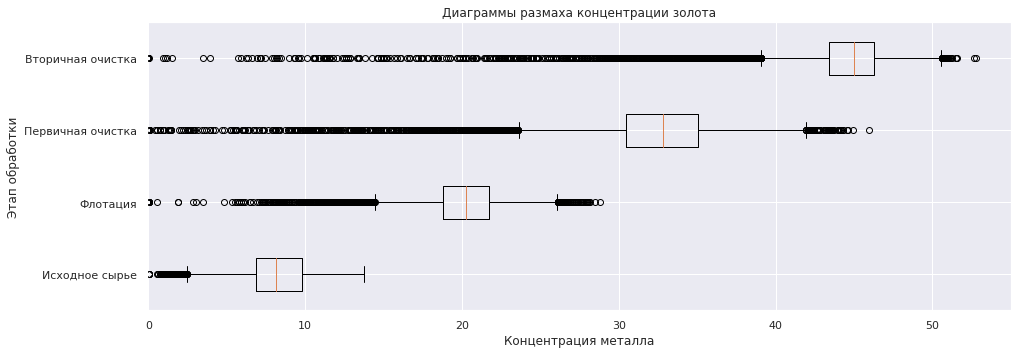

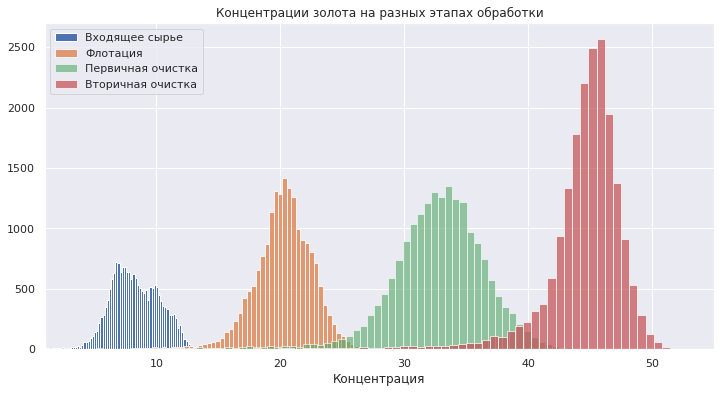

In [22]:
# Ящик с усами
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])  # left, bottom, width, height
ax.boxplot(data_to_plot_au, vert=False)
plt.xlim(-0.1, 55)
ax.set_yticklabels(['Исходное сырье', 'Флотация',
                    'Первичная очистка', 'Вторичная очистка'])
plt.title('Диаграммы размаха концентрации золота')
plt.xlabel('Концентрация металла')
plt.ylabel('Этап обработки')
plt.show()
# Гистограммы
input_au.hist(bins=80, figsize=(12, 6), label='Входящее сырье')
rougher_au.hist(bins=80, figsize=(12, 6), alpha=0.8, label='Флотация')
primary_au.hist(bins=80, figsize=(12, 6), alpha=0.6, label='Первичная очистка')
final_au.hist(bins=80, figsize=(12, 6), alpha=0.7, label='Вторичная очистка')
plt.title('Концентрации золота на разных этапах обработки')
plt.xlabel('Концентрация')
plt.xlim(1, 55)
plt.legend()
plt.show()


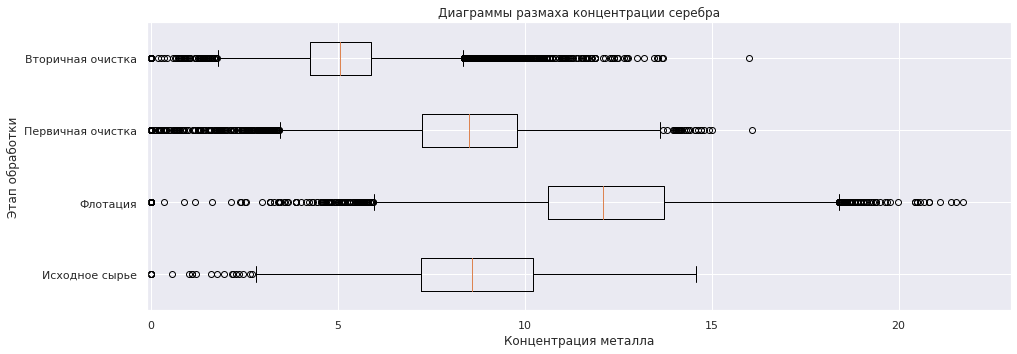

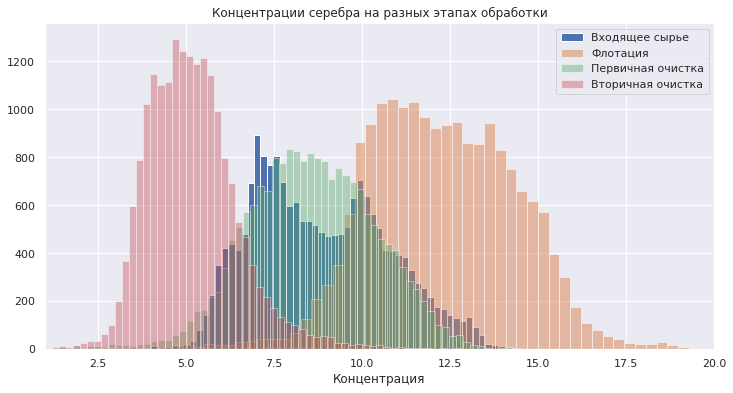

In [23]:
#Ящик с усами
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
ax.boxplot(data_to_plot_ag, vert=False)
plt.xlim(-0.1, 23)
ax.set_yticklabels(['Исходное сырье', 'Флотация',
                    'Первичная очистка', 'Вторичная очистка'])
plt.title('Диаграммы размаха концентрации серебра')
plt.xlabel('Концентрация металла')
plt.ylabel('Этап обработки')
plt.show()
# Гистограммы
input_ag.hist(bins=80, figsize=(12, 6), label='Входящее сырье')
rougher_ag.hist(bins=80, figsize=(12, 6), alpha=0.5, label='Флотация')
primary_ag.hist(bins=80, figsize=(12, 6), alpha=0.4, label='Первичная очистка')
final_ag.hist(bins=80, figsize=(12, 6), alpha=0.4, label='Вторичная очистка')
plt.title('Концентрации серебра на разных этапах обработки')
plt.xlabel('Концентрация')
plt.xlim(1, 20)
plt.legend()
plt.show()


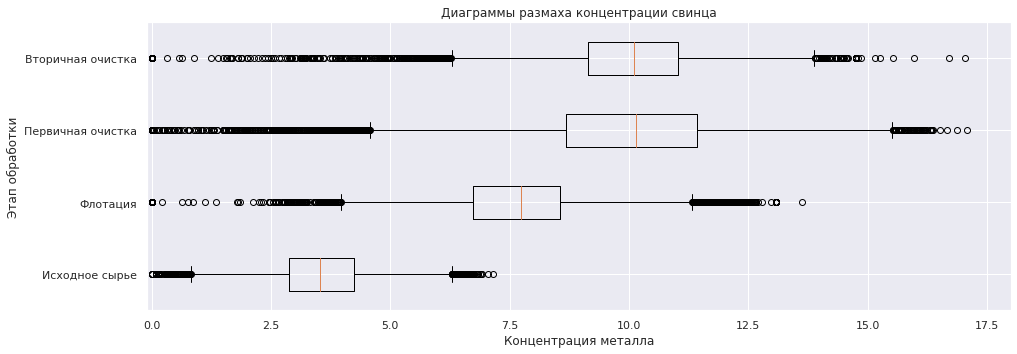

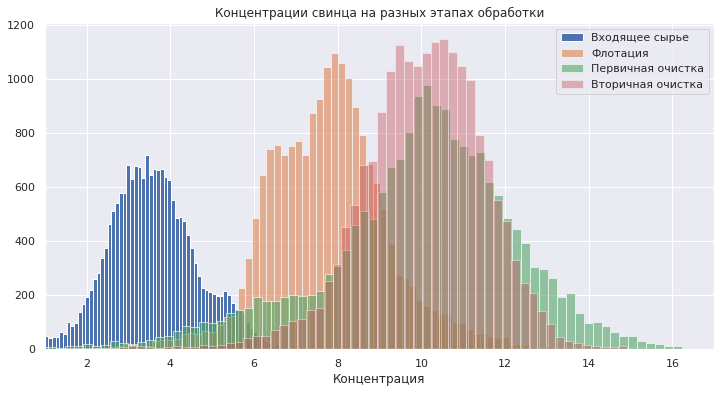

In [24]:
# Ящик с усами
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
ax.boxplot(data_to_plot_pb, vert=False)
plt.xlim(-0.1, 18)
ax.set_yticklabels(['Исходное сырье', 'Флотация',
                    'Первичная очистка', 'Вторичная очистка'])
plt.title('Диаграммы размаха концентрации свинца')
plt.xlabel('Концентрация металла')
plt.ylabel('Этап обработки')
plt.show()
# Гистограммы
input_pb.hist(bins=80, figsize=(12, 6), label='Входящее сырье')
rougher_pb.hist(bins=80, figsize=(12, 6), alpha=0.6, label='Флотация')
primary_pb.hist(bins=80, figsize=(12, 6), alpha=0.6, label='Первичная очистка')
final_pb.hist(bins=80, figsize=(12, 6), alpha=0.4, label='Вторичная очистка')
plt.title('Концентрации свинца на разных этапах обработки')
plt.xlabel('Концентрация')
plt.xlim(1, 17)
plt.legend()
plt.show()

### Вывод

Можем сделать вывод, что процесс трехступенчатой обработки сырья по-разному влияет на концентрации разных металлов. Так, для золота, флотация и каждая последующая очистка увеличивает концентрацию металла в среднем в  1,5 раза.  
Для серебра - обратная зависимость. По мере флотации и очистки концентрация металла снижается аналогичными темпами.  
Для свинца, существенное изменение концентрации происходит лишь на этапе флотации и первичной очистки.

## 2.2. Анализ распределения размеров гранул сырья <a id="2.2"></a>

Сравним распределение параметра `rougher.input.feed_size` для тестовой и обучающей выборки.

In [25]:
# данные для построения диаграмм размаха
data_to_plot = [gold_test['rougher.input.feed_size'],
                gold_train['rougher.input.feed_size']]

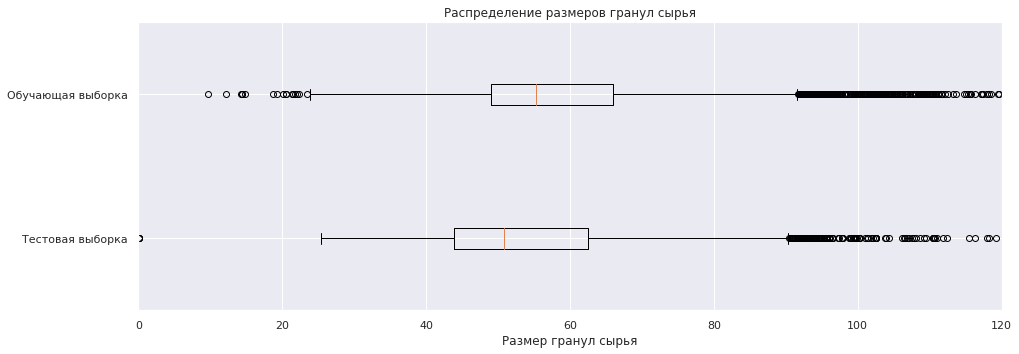

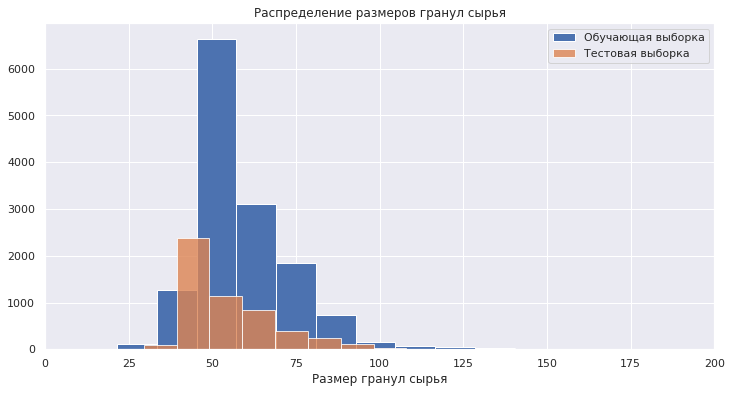

In [26]:
# Ящик с усами
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
ax.boxplot(data_to_plot, vert=False)
plt.xlim(-0.1, 120)
ax.set_yticklabels(['Тестовая выборка', 'Обучающая выборка'])
plt.title('Распределение размеров гранул сырья')
plt.xlabel('Размер гранул сырья')
plt.show()
# Гистограммы
gold_train['rougher.input.feed_size'].hist(
    bins=40, figsize=(12, 6), label='Обучающая выборка')
gold_test['rougher.input.feed_size'].hist(
    bins=40, alpha=0.8, figsize=(12, 6), label='Тестовая выборка')
plt.xlabel('Hf')
plt.title('Распределение размеров гранул сырья')
plt.xlabel('Размер гранул сырья')
plt.xlim(-0.1, 200)
plt.legend()
plt.show()

### Вывод

Распределения размеров гранул сырья для обучающей и тестовой выборок различаются, но это различие в пределах 10 % по медианному значению и межквартильному размаху. 
Будем считать, что это расхождение является допустимым для построения модели.


## 2.3. Исследование сумарной концентрации веществ на разных стадиях обработки <a id="2.2"></a>

In [27]:
gold_full['input_sum'] = gold_full['rougher.input.feed_ag'] + gold_full['rougher.input.feed_pb'] + \
    gold_full['rougher.input.feed_sol'] + gold_full['rougher.input.feed_au']
gold_full['rougher_sum'] = gold_full['rougher.output.concentrate_ag'] + gold_full['rougher.output.concentrate_pb'] + \
    gold_full['rougher.output.concentrate_sol'] + \
    gold_full['rougher.output.concentrate_au']
gold_full['primary_sum'] = gold_full['primary_cleaner.output.concentrate_ag'] + gold_full['primary_cleaner.output.concentrate_pb'] + \
    gold_full['primary_cleaner.output.concentrate_sol'] + \
    gold_full['primary_cleaner.output.concentrate_au']
gold_full['secondary_sum'] = gold_full['final.output.concentrate_ag'] + gold_full['final.output.concentrate_pb'] + \
    gold_full['final.output.concentrate_sol'] + \
    gold_full['final.output.concentrate_au']

In [28]:
data_to_plot = [gold_full['input_sum'], gold_full['rougher_sum'],
                gold_full['primary_sum'], gold_full['secondary_sum']]

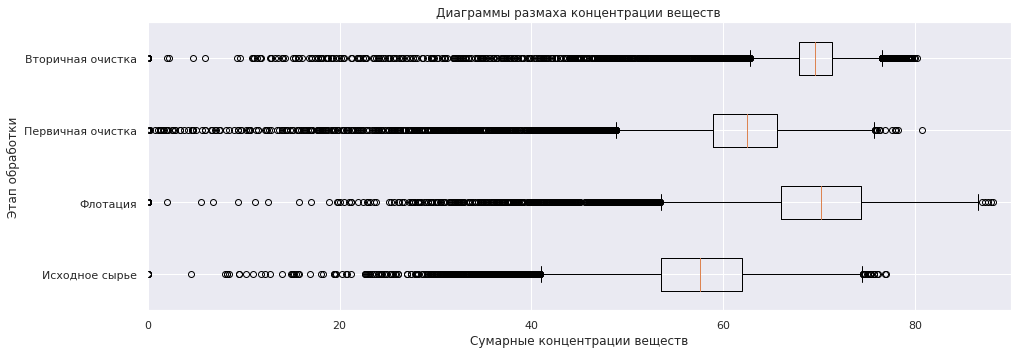

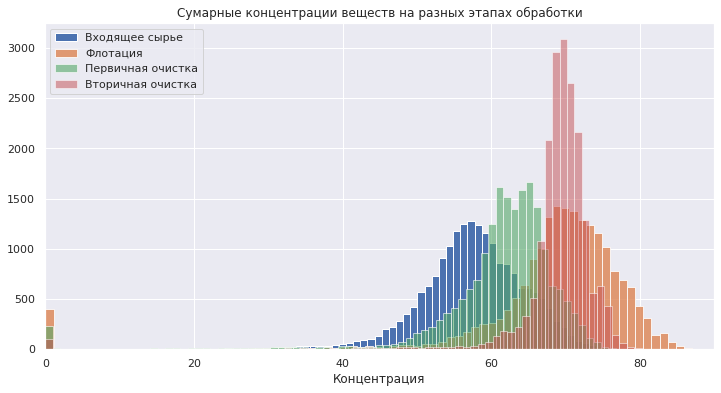

In [29]:
# Ящики с усами
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
ax.boxplot(data_to_plot, vert=False)
plt.xlim(-0.1, 90)
ax.set_yticklabels(['Исходное сырье', 'Флотация',
                    'Первичная очистка', 'Вторичная очистка'])
plt.title('Диаграммы размаха концентрации веществ')
plt.xlabel('Сумарные концентрации веществ')
plt.ylabel('Этап обработки')
plt.show()
# Гистограммы
gold_full['input_sum'].hist(bins=80, figsize=(12, 6), label='Входящее сырье')
gold_full['rougher_sum'].hist(
    bins=80, figsize=(12, 6), alpha=0.8, label='Флотация')
gold_full['primary_sum'].hist(bins=80, figsize=(
    12, 6), alpha=0.6, label='Первичная очистка')
gold_full['secondary_sum'].hist(bins=80, figsize=(
    12, 6), alpha=0.5, label='Вторичная очистка')
plt.title('Сумарные концентрации веществ на разных этапах обработки')
plt.xlabel('Концентрация')
plt.xlim(-0.1, 90)
plt.legend()
plt.show()

Видим, что есть околонулевые значения концентраций металлов в исходном сырье и на последующих этапах обработки. Возможно имет место ошибка данных, удалим данные строки из тестовой и тренировочной выборок.  
Прочие возможные выбросы оставим без обработки, т.к. есть вероятность, что это они важны в текущем технологическом процессе и должны участвовать в построении модели.

In [30]:
gold_full.query(
    'input_sum < 1 or rougher_sum < 1 or primary_sum < 1 or secondary_sum < 1')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,input_sum,rougher_sum,primary_sum,secondary_sum
19,2016-01-15 19:00:00,5.658943,10.436002,5.942418,42.509402,70.348300,10.232392,1.174845,19.498566,2.272460,...,10.032043,-499.128183,8.016140,-499.806844,13.949790,-600.140776,56.005644,62.930764,0.000000,64.546766
22,2016-01-15 22:00:00,6.118749,10.483007,6.546983,41.406172,69.823900,10.322077,1.270956,19.384247,2.245145,...,9.985232,-499.796583,7.985524,-499.872153,13.973257,-600.054998,56.038252,62.225893,0.000000,64.554911
30,2016-01-16 06:00:00,5.322681,9.577672,4.805490,44.059908,69.193840,10.334312,1.406355,19.923319,2.239310,...,9.969535,-499.350934,8.017975,-500.620850,11.999969,-600.315548,57.764677,62.283147,0.000000,63.765751
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228,58.602038,0.000000,74.992510,66.175996
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683,59.921613,0.000000,75.187102,66.794250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19253,2018-08-10 03:59:59,4.442023,9.238301,8.544080,46.335757,70.786883,15.481737,4.182762,10.009065,3.699811,...,22.953779,-498.555444,17.997955,-500.101945,23.010025,-517.763087,65.372679,74.231258,0.040000,68.560160
19254,2018-08-10 04:59:59,4.916341,9.644849,8.945859,44.961086,67.943045,16.154268,4.374716,10.503920,4.018436,...,23.018333,-499.900014,17.966376,-500.193360,23.000951,-511.958802,65.082625,75.579562,0.040000,68.468135
19255,2018-08-10 05:59:59,5.134035,9.683889,9.203260,44.519141,72.002510,15.955848,4.365837,10.190798,3.492422,...,22.885700,-499.773159,17.931386,-500.026603,23.009269,-521.406956,64.927849,74.882662,0.040000,68.540325
19256,2018-08-10 06:59:59,4.503756,8.387537,7.408152,35.313266,81.349671,9.262237,2.541834,5.580436,1.704367,...,19.961717,-484.411358,14.988112,-498.198420,22.974569,-504.838074,45.851614,43.117470,0.040000,55.612711


In [31]:
# список строк для удаления
date_del = gold_full.query('input_sum < 1 or rougher_sum < 1 or primary_sum < 1 or secondary_sum < 1')['date'].to_list()

In [32]:
gold_train.query('date == @date_del')

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
19,2016-01-15 19:00:00,149.998260,12.509947,7.250000,0.997030,1599.617983,-499.527131,1599.389604,-499.554869,1600.441370,...,12.087669,-510.782166,10.032043,-499.128183,8.016140,-499.806844,13.949790,-600.140776,70.348300,86.241795
22,2016-01-15 22:00:00,158.353434,14.020791,7.250000,0.997999,1596.351031,-498.896997,1596.177717,-500.402418,1598.280618,...,11.993920,-550.493894,9.985232,-499.796583,7.985524,-499.872153,13.973257,-600.054998,69.823900,88.132239
30,2016-01-16 06:00:00,145.952867,13.947704,7.250000,0.991678,1599.096777,-498.630270,1599.484314,-499.255872,1598.366222,...,12.004777,-549.974630,9.969535,-499.350934,8.017975,-500.620850,11.999969,-600.315548,69.193840,88.066903
45,2016-01-16 21:00:00,131.251366,13.969457,7.250000,1.203034,1601.674776,-500.285160,1600.151967,-499.633542,1599.542959,...,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228,68.403877,0.000000
46,2016-01-16 22:00:00,141.184039,13.978607,7.250000,1.248254,1604.852903,-500.922517,1603.005456,-499.631837,1599.307763,...,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683,70.675633,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13963,2018-08-10 03:59:59,207.503594,15.024496,7.110000,0.599841,1649.621081,-399.553741,1649.348949,-401.442567,1649.558818,...,23.036534,-499.490454,22.953779,-498.555444,17.997955,-500.101945,23.010025,-517.763087,70.786883,92.923271
13964,2018-08-10 04:59:59,212.827656,15.027298,7.230000,0.680387,1650.108633,-400.612971,1649.286581,-398.631886,1650.714620,...,22.944209,-500.369741,23.018333,-499.900014,17.966376,-500.193360,23.000951,-511.958802,67.943045,91.636934
13965,2018-08-10 05:59:59,206.821559,15.001447,7.230000,0.703681,1649.069642,-400.714127,1649.562146,-400.086547,1649.465308,...,23.074248,-500.214741,22.885700,-499.773159,17.931386,-500.026603,23.009269,-521.406956,72.002510,93.396029
13966,2018-08-10 06:59:59,212.856122,14.928237,7.286666,0.666859,1650.282867,-400.049760,1650.462339,-400.157797,1650.480732,...,22.998882,-499.387153,19.961717,-484.411358,14.988112,-498.198420,22.974569,-504.838074,81.349671,95.120397


In [33]:
gold_test.query('date == @date_del')

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
30,2016-09-02 06:59:59,126.329123,8.003034,7.160000,0.699695,412.629243,-795.316337,413.703253,-787.396567,441.604260,...,4.625908,-678.347958,4.451592,-795.337422,3.544708,-800.024373,5.914889,-799.501783,0.000000,0.000000
85,2016-09-04 17:59:59,141.260562,8.041141,7.940000,0.593102,1302.984840,-499.988453,1297.834274,-500.210380,1295.561077,...,7.966400,-498.782241,7.977692,-502.014930,4.998612,-500.527864,9.948471,-498.000234,57.120911,0.000000
86,2016-09-04 18:59:59,135.403245,8.109890,8.235000,0.598479,1302.737427,-500.201316,1297.553194,-499.405170,1295.736073,...,7.991628,-500.049617,7.989519,-499.921227,4.934784,-499.806182,9.981727,-499.334783,52.005176,0.000000
87,2016-09-04 19:59:59,134.214024,8.002202,8.530000,0.625177,1303.125981,-499.867508,1297.296122,-500.401509,1296.123016,...,8.089971,-501.577711,7.956845,-500.528980,5.044713,-500.517044,9.986923,-500.352735,54.860958,0.000000
88,2016-09-04 20:59:59,131.144955,8.052567,8.290000,0.561138,1303.050322,-499.840711,1297.350695,-499.390859,1296.558438,...,7.960043,-498.507732,7.818989,-497.884815,4.966728,-500.390106,9.975998,-499.693641,55.044992,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,2017-12-25 20:59:59,2.566156,7.061140,7.900000,0.596297,1599.742252,-368.905787,1600.344228,-437.154266,1321.275844,...,15.090724,-501.300294,10.972631,-502.648521,8.962803,-500.033494,12.005303,-533.891295,0.000000,6.705438
5181,2017-12-26 19:59:59,137.612362,10.316957,5.800000,0.740978,1602.511948,-393.302755,1597.432341,-424.984334,1299.103981,...,14.897977,-499.892176,10.923265,-496.073855,9.052940,-499.780110,11.998058,-498.700110,0.000000,79.705229
5182,2017-12-26 20:59:59,170.646906,14.300399,7.004998,0.695363,1602.131085,-403.600008,1601.125899,-385.187349,1269.949584,...,14.916886,-498.024756,10.962281,-498.858810,9.015296,-500.349342,12.020402,-500.137799,0.000000,83.325755
5247,2017-12-30 05:59:59,164.599204,16.000458,7.590000,0.899290,1371.609777,-440.295840,1365.610800,-431.533002,1366.022966,...,13.257529,-500.339140,9.280499,-499.854966,7.342554,-499.741386,10.360721,-501.773240,79.316837,92.144494


Удалим нулевые строки с расчетными величинами в обучающей и тестовой выборках.  Полную выборку оставим без изменений, т.к. ее дальше не используем, переходим к отработке моделей на обучающей и тестовой выборках.

In [34]:
# удаляем в обучающей выборке
gold_train = gold_train.query('date != @date_del')

In [35]:
# удаляем в обучающей выборке
gold_test = gold_test.query('date != @date_del')

In [36]:
# Проверяем
gold_train.query('date == @date_del')

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery


In [37]:
# Проверяем
gold_test.query('date == @date_del')

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery


### Вывод

Был проведен анализ данных, исследовано изменение концентрации металлов на различных этапах обработки. Выяснено, что изменение концентраций различается по разным металлам, положительная динамика  увеличения концентрации на каждом из этапов очистки проявляется только для золота.   
Исследованы распределения размеров гранул сырья в обучающей и тестовой выборках. Распределения близки, что говорит о возможности моделирования процесса на имеющихся выборках.  
Удалены потенциально ошибочные выбросы.

# 3.Построение модели <a id="3"></a>

## 3.1. Создание функции вычисления sMAPE <a id="3.1"></a>

In [38]:
def smape(target, predict):
    """
    Функция для расчета sMAPE:
    target - целевой признак
    predict - предсказания
    Возвращает значение sMAPE.
    """
    return np.sum((np.abs(target - predict) * 2) / (np.abs(target) + np.abs(predict))) / len(predict) * 100

In [39]:
custom_scorer = make_scorer(smape, greater_is_better=False)

## 3.2. Обучение моделей  <a id="3.2"></a>

In [40]:
# Выделим признаки в обучающей и тестовой выборках
#target_train = gold_train[['rougher.output.recovery', 'final.output.recovery']]
target_train_1 = gold_train['rougher.output.recovery']
target_train_2 = gold_train['final.output.recovery']
features_train = gold_train.drop(
    ['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
#target_test = gold_test[['rougher.output.recovery', 'final.output.recovery']]
target_test_1 = gold_test['rougher.output.recovery']
target_test_2 = gold_test['final.output.recovery']

features_test = gold_test.drop(
    ['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

### Линейная регрессия

In [41]:
model = LinearRegression()
smape_rougher = pd.Series(cross_val_score(
    model, features_train, target_train_1, scoring=custom_scorer, cv=3)).max()
print('sMAPE(rougher)', smape_rougher)

smape_final = pd.Series(cross_val_score(
    model, features_train, target_train_2, scoring=custom_scorer, cv=3)).max()
print('sMAPE(final)', smape_final)

smape_itog = 0.25 * smape_rougher + 0.75 * smape_final
print('Итоговое sMAPE', smape_itog)

sMAPE(rougher) -8.8137845115586
sMAPE(final) -12.089140896606475
Итоговое sMAPE -11.270301800344507


### Случайный лес

In [42]:
model = RandomForestRegressor(random_state=12345)
# уже оптимизированные параметры, для экономии времени расчета
parameters = {'n_estimators': range(5, 6), 'max_depth': range(2, 6)}
grid = GridSearchCV(model, parameters, scoring=custom_scorer, cv=3)
grid.fit(features_train, target_train_1)

print('Оптимальные параметры модели:', grid.best_params_)
smape_rougher = grid.best_score_
print('sMAPE(rougher)', smape_rougher)

grid.fit(features_train, target_train_2)
print('Оптимальные параметры модели:', grid.best_params_)
smape_final = grid.best_score_
print('sMAPE(final)', smape_final)
smape_itog = 0.25 * smape_rougher + 0.75 * smape_final
print('Итоговое sMAPE', smape_itog)

Оптимальные параметры модели: {'max_depth': 3, 'n_estimators': 5}
sMAPE(rougher) -7.916142427856691
Оптимальные параметры модели: {'max_depth': 2, 'n_estimators': 5}
sMAPE(final) -10.164932773251467
Итоговое sMAPE -9.602735186902773


### XGBoost

In [43]:
model = XGBRegressor(random_state=12345)
# уже оптимизированные параметры, для экономии времени расчета
parameters = {'n_estimators': range(15, 19), 'max_depth': range(2, 3)}
grid = GridSearchCV(model, parameters, scoring=custom_scorer, cv=3)
grid.fit(features_train, target_train_1)

print('Оптимальные параметры модели:', grid.best_params_)
smape_rougher = grid.best_score_
print('sMAPE(rougher)', smape_rougher)

grid.fit(features_train, target_train_2)
print('Оптимальные параметры модели:', grid.best_params_)
smape_final = grid.best_score_
print('sMAPE(final)', smape_final)
smape_itog = 0.25 * smape_rougher + 0.75 * smape_final
print('Итоговое sMAPE', smape_itog)

Оптимальные параметры модели: {'max_depth': 2, 'n_estimators': 16}
sMAPE(rougher) -7.650374761245815
Оптимальные параметры модели: {'max_depth': 2, 'n_estimators': 15}
sMAPE(final) -10.242243164164103
Итоговое sMAPE -9.594276063434531


### Итоговое тестирование

In [44]:
model = RandomForestRegressor(random_state=12345, max_depth=5, n_estimators=6)
model.fit(features_train, target_train_1)
prediction_1 = model.predict(features_test)
smape_rougher = smape(target_test_1, prediction_1)
print('sMAPE(rougher)', smape_rougher)

model = RandomForestRegressor(random_state=12345, max_depth=2, n_estimators=6)
model.fit(features_train, target_train_2)
prediction_2 = model.predict(features_test)
smape_final = smape(target_test_2, prediction_2)
print('sMAPE(final)', smape_final)
smape_itog = 0.25 * smape_rougher + 0.75 * smape_final
print('Итоговое sMAPE', smape_itog)

sMAPE(rougher) 4.482501939336519
sMAPE(final) 7.73927367997803
Итоговое sMAPE 6.925080744817652


### Вывод 

Были обучены 3 модели (LinearRegression, RandomForestRegressor, XGBRegressor).  
Наилучшие результаты со значением искомой метрики "Итоговое sMAPE" = 9.6 на тренировочной выборке показала модель Случайного леса. На ней же было проведено итоговое тестирование.   
Значение итогового sMAPE на тесте составило 6.9


# Общий вывод

Целью данного исследования было создание модели прогнозирования содержания золота в исходной руде, для исключения разработки заведомо убыточных участков.  
Был проведен исследовательский анализ данных, оценены изменения концентраций добываемых металлов на разных этапах очистки руды, построены различные модели прогнозирования целевых величин.  
Выбрана оптимальная модель (Случайный лес), обеспечиващая наилучшее качество метрик.